# Captcha Data Cleaning and EDA

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline 

In [2]:
import string
import os

In [3]:
import tensorflow as tf

from tensorflow.keras.layers import Input
from tensorflow.keras import Model

import cv2

## Data Cleaning

### Load Data

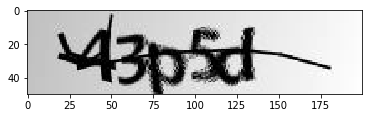

In [206]:
# example from 1000 image dataset
simg=cv2.imread('data/s_data/43p5d.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(simg, cmap=plt.get_cmap('gray'))

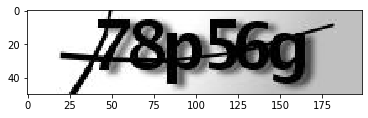

In [207]:
# example from AWS website
img=cv2.imread('trial.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

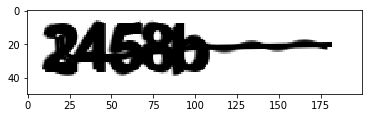

In [283]:
# example from 100,000 image dataset 
img=cv2.imread('data/l_data/2458b.png', cv2.IMREAD_UNCHANGED)[:,:,3]

# remove border 
img[[0,49],1:199] -= 255
img[:,0] -= 255
img[:,199] -= 255

plt.imshow(img, cmap=plt.cm.binary)

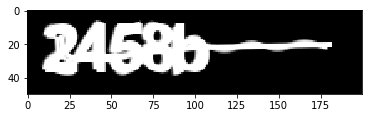

In [282]:
# for anti grayscale
img=cv2.imread('data/l_data/2458b.png',cv2.IMREAD_UNCHANGED)
a = img[:,:,3]
lst = []

for i in a.flatten():
    lst.append(np.abs(i - 255))
lst = np.array(lst)
img = lst.reshape(50, 200)

img[[0,49],1:199] += 255
img[:,0] += 255
img[:,199] += 255

plt.imshow(img, cmap=plt.cm.binary)

### Removing Border and Create Target

In [275]:
# image data processing functions

def s_data_process(from_src=False):
    '''Processes the s_data folder of 1070 images 
    Parameters:
    -----------
    from_src: True if function is run from src folder
    
    Returns:
    X: 3 tensor numpy array of image data
    y: labels for image data
    '''
    if from_src:
        path = '../data/s_data/'
    else:
        path = 'data/s_data/'
        
    X = []
    y = []
    for name in os.listdir(path):
        img_path = path + name
        img = cv2.imread(img_path , cv2.IMREAD_GRAYSCALE)
        
        X.append(img)
        y.append(name[:-4])
    
    return np.array(X), np.array(y)
    
def l_data_process(from_src=False):
    '''Processes the l_data folder of 109,053 images 
    Parameters:
    -----------
    from_src: True if function is run from src folder
    
    Returns:
    X: 3 tensor numpy array of image data
    y: labels for image data
    '''
    if from_src:
        path = '../data/l_data/'
    else:
        path = 'data/l_data/'
        
    X = []
    y = []
    for name in os.listdir(path):
        img_path = path + name
        img = cv2.imread(img_path , cv2.IMREAD_UNCHANGED)[:,:,3]
        
        # remove border
        img[[0,49],1:199] -= 255
        img[:,0] -= 255
        img[:,199] -= 255
        
        X.append(img)
        y.append(name[:-4])
    
    return np.array(X), np.array(y)

In [276]:
s_X, s_y = s_data_process()
s_X.shape, s_y.shape

((1070, 50, 200), (1070,))

In [277]:
s_y[:10]

array(['p5g5m', 'e72cd', 'pgmn2', '6cm6m', '68wfd', 'byc82', 'gcx6f',
       'd8dce', 'gd4mf', 'fy2nd'], dtype='<U5')

In [278]:
l_X, l_y = l_data_process()
l_X.shape, l_y.shape

((109053, 50, 200), (109053,))

In [279]:
l_y[:10]

array(['hw63n', '53p36', 'xdg32', 'xre3b', 'gyyr6', '27gha', 'mkygb',
       '3xyyf', '5bf3b', 'np847'], dtype='<U5')

In [286]:
s_X[0].shape

(50, 200)

In [285]:
l_X[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

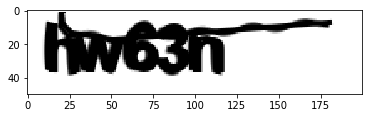

In [308]:
plt.imshow(l_X[0], cmap=plt.cm.binary)

## Exploratory Data Analysis

In [305]:
slst_of_chars = []
for s in s_y:
    slst_of_chars += [char for char in s]
len(slst_of_chars)/1070, len(slst_of_chars)

(5.0, 5350)

In [307]:
pd.Series(slst_of_chars).value_counts().sort_index()

2    270
3    271
4    289
5    288
6    267
7    262
8    272
b    247
c    276
d    269
e    245
f    277
g    281
m    282
n    540
p    259
w    244
x    271
y    240
dtype: int64

In [299]:
lst_of_chars = []
for s in l_y:
    lst_of_chars += [char for char in s]
len(lst_of_chars)/109053, len(lst_of_chars)

(5.0, 545265)

In [303]:
pd.Series(lst_of_chars).value_counts().sort_index()

2    23887
3    23531
4    23721
5    23803
6    23883
7    23759
8    23426
a    23804
b    23535
c    23722
d    23442
e    23879
f    23731
g    23629
h    23647
k    23629
m    23592
n    24148
p    23580
r    23846
w    23575
x    23817
y    23679
dtype: int64

## Split Data

In [ ]:
train